In [52]:
import pandas as pd
import numpy as np
import scipy as sp
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df=pd.read_csv("insurance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
df.describe()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [56]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [57]:
df.shape

(1338, 7)

In [58]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [59]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [60]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


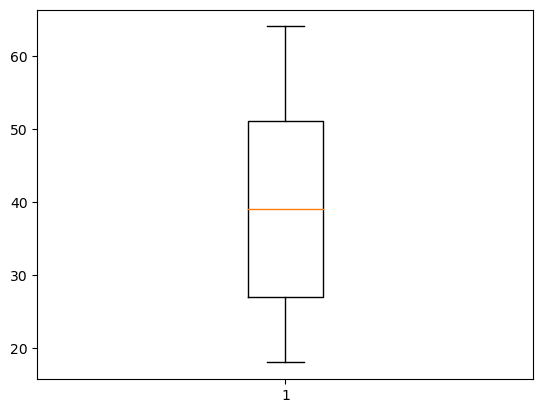

In [61]:
plt.boxplot(df['age'])
plt.show()

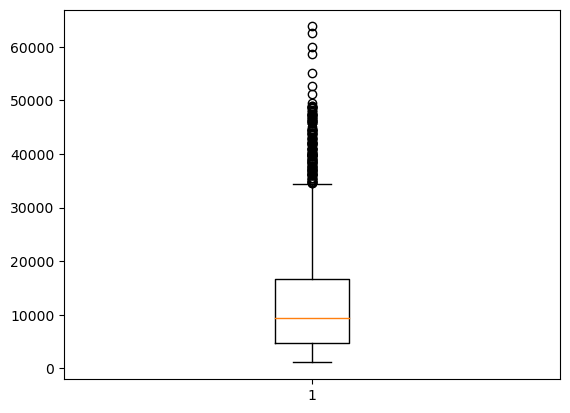

In [62]:
plt.boxplot(df['charges'])
plt.show()

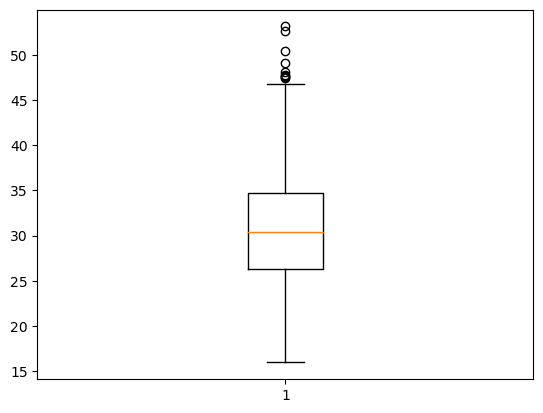

In [63]:
plt.boxplot(df['bmi'])
plt.show()

34.69375
26.29625


<Axes: >

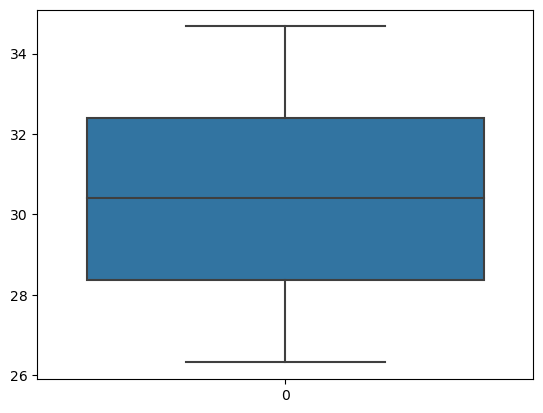

In [64]:
ul = df['bmi'].quantile(0.75)
ll = df['bmi'].quantile(0.25)
print(ul)
print(ll )
nd = df[(df['bmi'] <= ul) & (df['bmi'] >= ll)]
sns.boxplot(nd['bmi'])

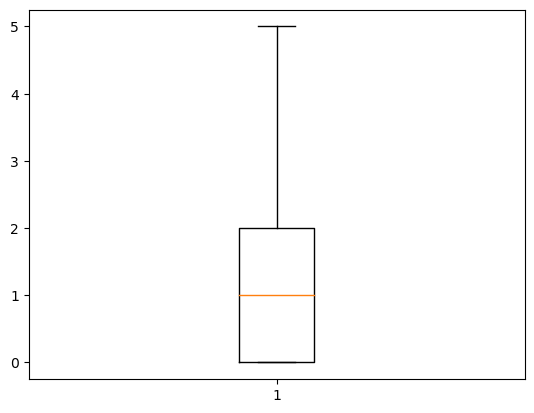

In [65]:
plt.boxplot(df['children'])
plt.show()

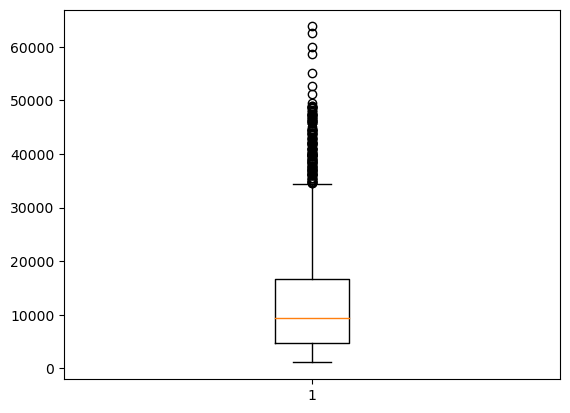

In [66]:
plt.boxplot(df['charges'])
plt.show()

16639.912515
4740.28715


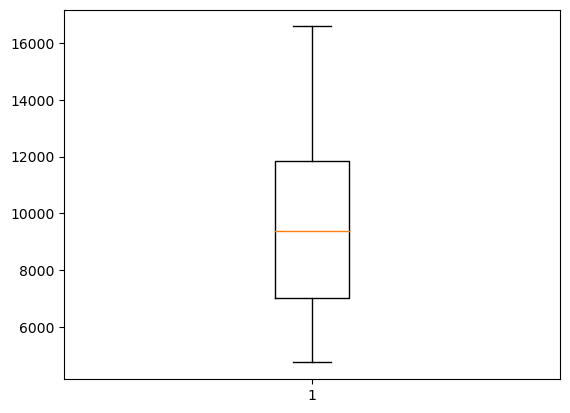

In [67]:
ul = df['charges'].quantile(0.75)
ll = df['charges'].quantile(0.25)
print(ul)
print(ll)
nd = df[(df['charges'] <= ul) & (df['charges'] >= ll)]
plt.boxplot(nd['charges'])
plt.show()

c:\Users\satish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


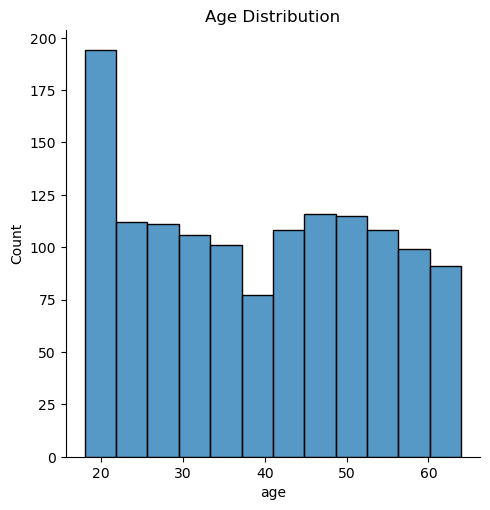

In [68]:
sns.displot(df['age'])
plt.title("Age Distribution")
plt.show()

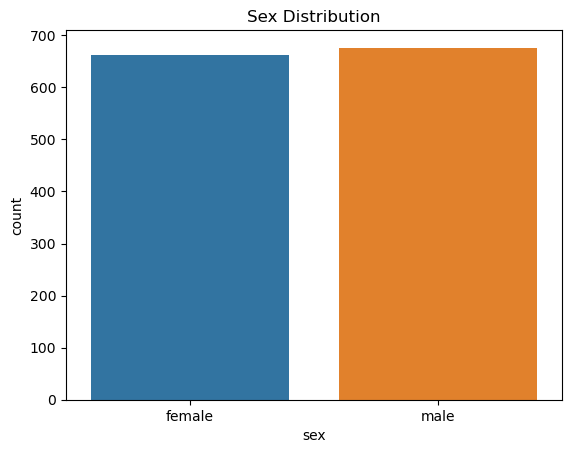

In [69]:
sns.countplot(x='sex',data=df)
plt.title("Sex Distribution")
plt.show()

In [70]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

c:\Users\satish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


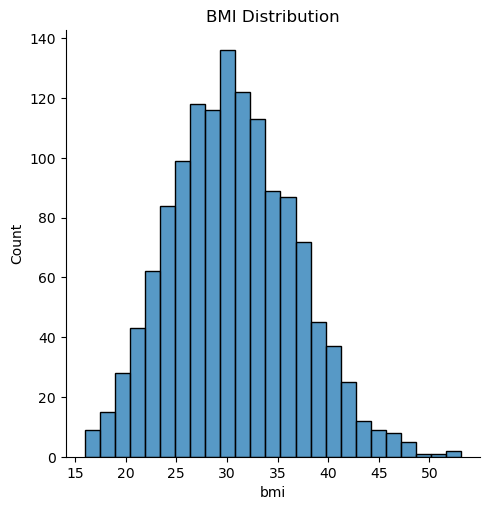

In [71]:
sns.displot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

c:\Users\satish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


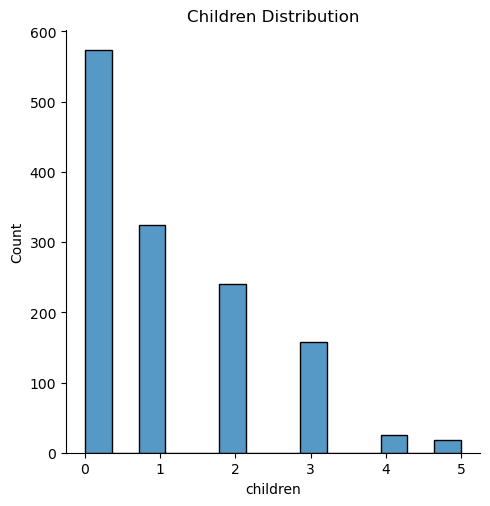

In [72]:
sns.displot(x='children',data=df)
plt.title("Children Distribution")
plt.show()

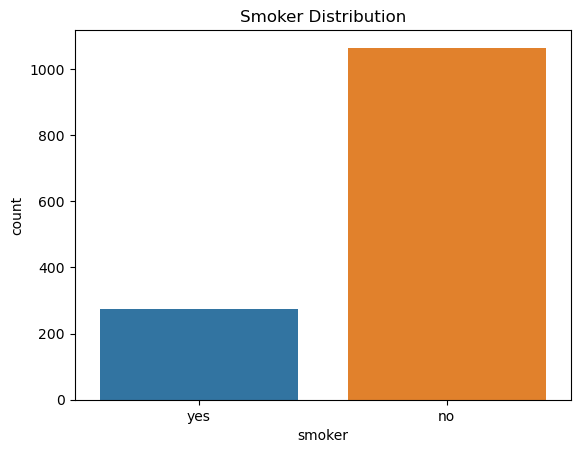

In [73]:
sns.countplot(x='smoker',data=df)
plt.title("Smoker Distribution")
plt.show()

In [74]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

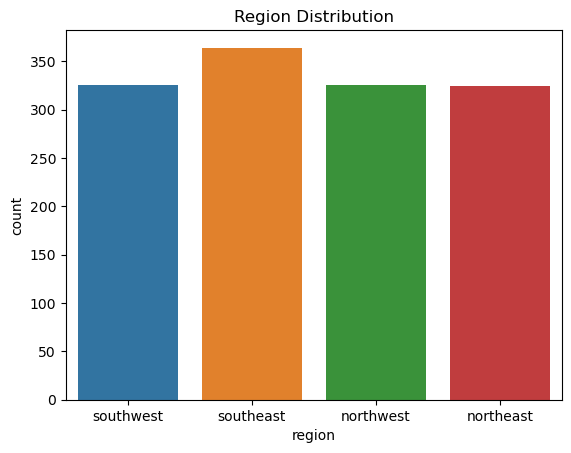

In [75]:
sns.countplot(x='region',data=df)
plt.title("Region Distribution")
plt.show()

In [76]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

c:\Users\satish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


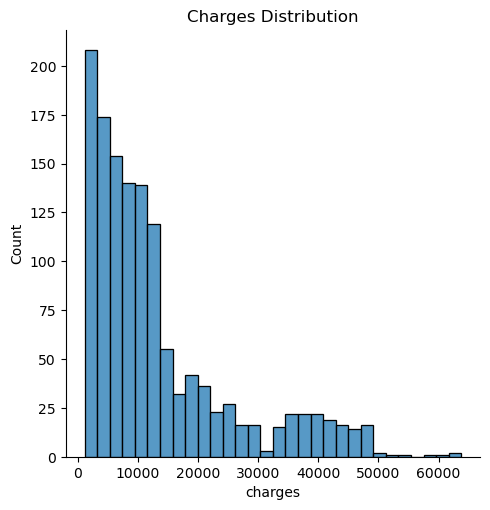

In [77]:
sns.displot(df['charges'])
plt.title("Charges Distribution")
plt.show()

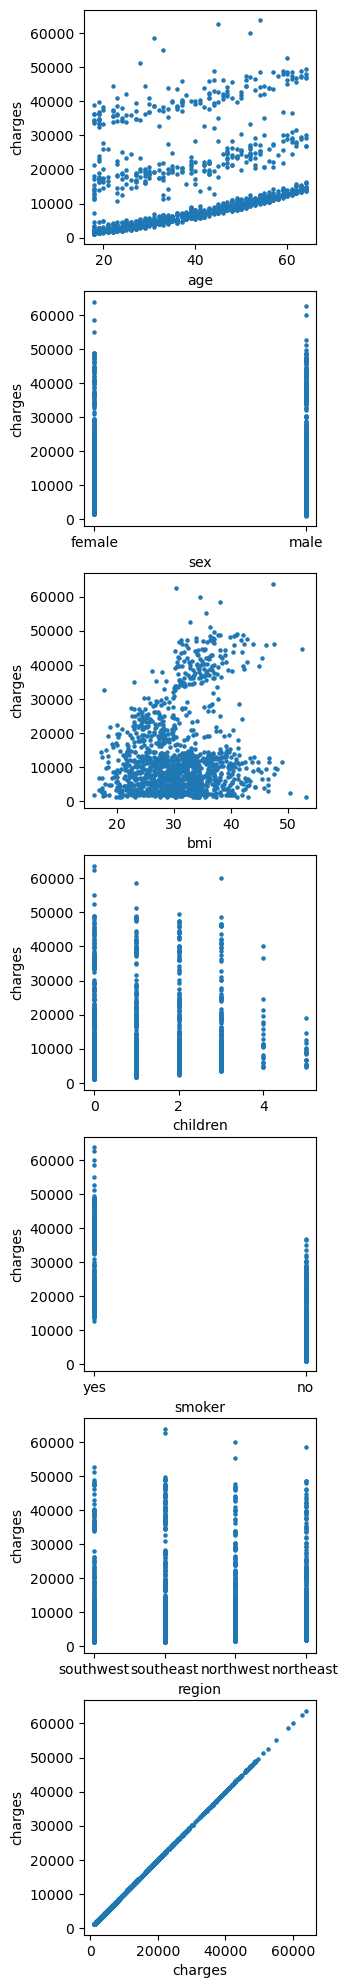

In [78]:
colnum=len(df.columns)
fig,a=plt.subplots(colnum,1,figsize=(3,25))
a[0].set_ylabel("charges")
for ind,col in enumerate([i for i in df.columns]):

    a[ind].scatter(df[col],df.charges,s=5)
    a[ind].set_xlabel(col)
    a[ind].set_ylabel("charges")
plt.show()

In [79]:
df['sex'].replace(['female', 'male'],[0, 1], inplace=True)
df['smoker'].replace(['yes', 'no'],[0, 1], inplace=True)
df['region'].replace(['southeast', 'southwest','northeast','northwest'],[0, 1,2,3], inplace=True)
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3,10600.54830
1334,18,0,31.920,0,1,2,2205.98080
1335,18,0,36.850,0,1,0,1629.83350
1336,21,0,25.800,0,1,1,2007.94500


age :  0.2990081933306478
sex :  0.05729206220202522
bmi :  0.19834096883362912
children :  0.06799822684790455
smoker :  0.7872514304984748
region :  0.05699278109241905
charges :  1.0


Text(0, 0.5, 'Absolute correlation')

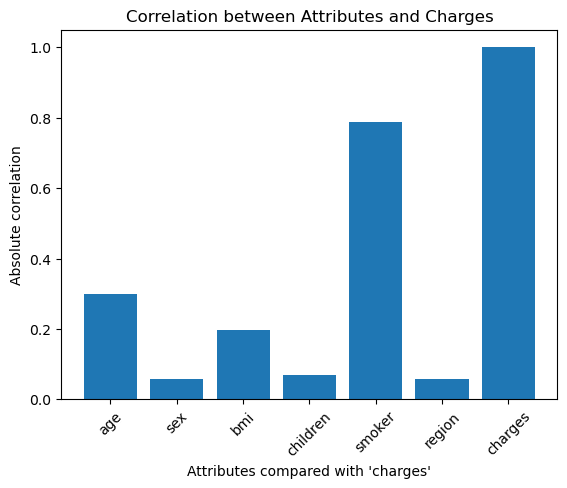

In [80]:
corr=[]
collabel=[]
for col in [i for i in df.columns if i not in ['charges_category']]:
    val=sp.stats.pearsonr(df[col],df["charges"])
    corr.append(np.abs(val[0]))
    print(col,": ",np.abs(val[0]))
    collabel.append(col)
plt.bar(range(1,len(corr)+1),corr)
plt.xticks(range(1,len(corr)+1),collabel,rotation=45)
plt.ylabel("Absolute correlation")
plt.title("Correlation between Attributes and Charges")
plt.xlabel("Attributes compared with 'charges'")
plt.ylabel("Absolute correlation")

In [81]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,0.025019,0.005212,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,-0.076185,-0.016121,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,-0.003750,-0.261829,0.198341
children,0.042469,0.017163,0.012759,1.000000,-0.007673,0.019257,0.067998
smoker,0.025019,-0.076185,-0.003750,-0.007673,1.000000,0.053930,-0.787251
region,0.005212,-0.016121,-0.261829,0.019257,0.053930,1.000000,-0.056993
charges,0.299008,0.057292,0.198341,0.067998,-0.787251,-0.056993,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

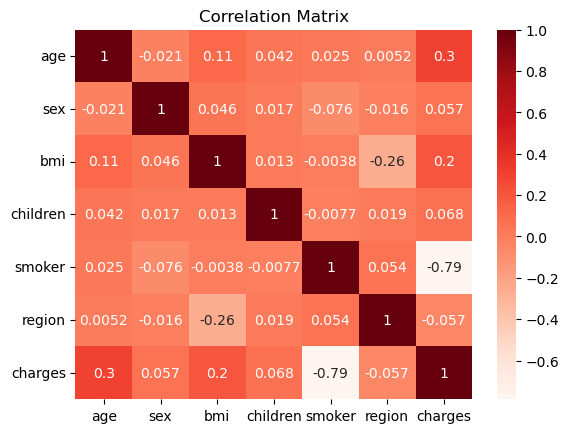

In [82]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [83]:
x=df.iloc[:,:-1]
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,1
1,18,1,33.770,1,1,0
2,28,1,33.000,3,1,0
3,33,1,22.705,0,1,3
4,32,1,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3
1334,18,0,31.920,0,1,2
1335,18,0,36.850,0,1,0
1336,21,0,25.800,0,1,1


In [84]:
y=df.iloc[:,-1:]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [85]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [87]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (936, 6) (402, 6)


In [88]:
print(y.shape,y_train.shape,y_test.shape)

(1338, 1) (936, 1) (402, 1)


LINEAR REGRESSION

MSE: 33368758.796567168
R-squared: 0.7907514220754801
MAE: 4018.0493717255913
RMSE: 5776.569812316577
Linear Regression Accuracy: 79.07514220754801
Cross-validated Linear Regression Accuracy: 73.99283812848074


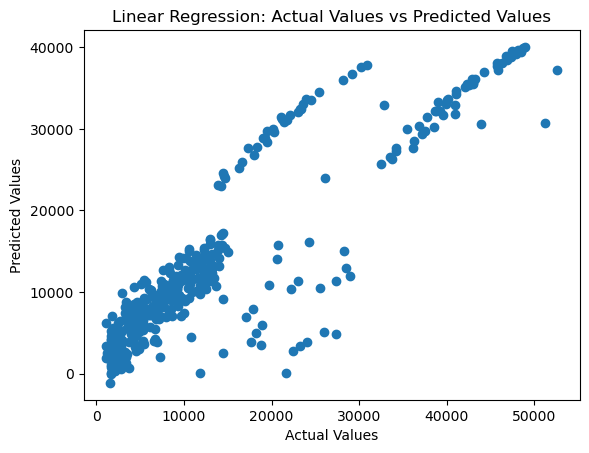

In [89]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
linear_reg_accuracy = linear_reg.score(x_test, y_test)
y_pred = linear_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
Linear_reg_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
Linear_reg_rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"R-squared: {Linear_reg_r2}")
print(f"MAE: {mae}")
print(f"RMSE: {Linear_reg_rmse}")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"Linear Regression Accuracy: {linear_reg_accuracy*100}")
cv_linear_reg = cross_val_score(LinearRegression(), x, y, cv=kf)
cvlnr=cv_linear_reg.mean()
print(f"Cross-validated Linear Regression Accuracy: {cvlnr*100}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual Values vs Predicted Values")
plt.show()

POLYNOMIAL REGRESSION

MSE: 19651270.935976338
R-squared: 0.8767709484541714
MAE: 2831.9285575970152
RMSE: 4432.975404395601
Polynomial Regression Accuracy: 87.67709484541713
Cross-validated Polynomial Regression Accuracy: 83.47665043768379


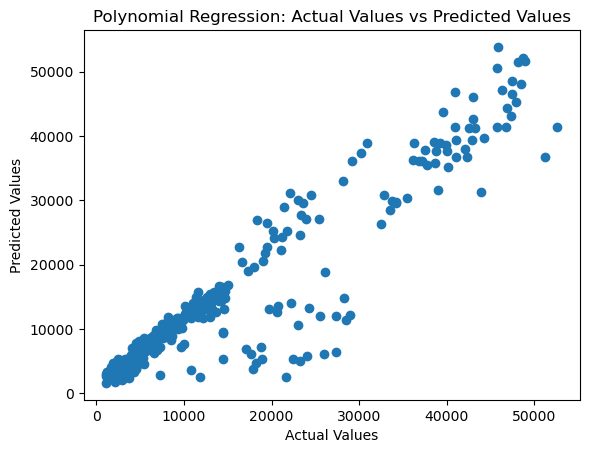

In [90]:
degree = 2
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(x_train, y_train)
poly_reg_accuracy = poly_reg.score(x_test, y_test)
y_pred = poly_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
Polynomial_reg_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
Polynomial_reg_rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"R-squared: {Polynomial_reg_r2}")
print(f"MAE: {mae}")
print(f"RMSE: {Polynomial_reg_rmse}")
kf=KFold(n_splits=5,shuffle=True,random_state=42)
print(f"Polynomial Regression Accuracy: {poly_reg_accuracy*100}")
cv_poly_reg=cross_val_score(poly_reg,x,y,cv=kf)
cvpr=cv_poly_reg.mean()
print(f"Cross-validated Polynomial Regression Accuracy: {cvpr*100}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial Regression: Actual Values vs Predicted Values")
plt.show()


RIDGE REGRESSION

MSE: 33442755.053463627
R-squared: 0.7902874068682704
MAE: 4032.623534491421
RMSE: 5782.971126805289
Ridge Regression Accuracy: 79.02874068682704
Cross-validated Ridge Regression Accuracy: 73.99930662925996


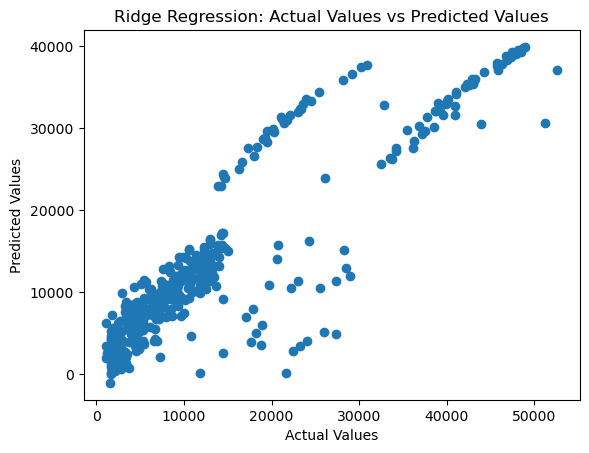

In [91]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
ridge_reg_accuracy = ridge_reg.score(x_test, y_test)
y_pred = ridge_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
Ridge_reg_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
Ridge_reg_rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"R-squared: {Ridge_reg_r2}")
print(f"MAE: {mae}")
print(f"RMSE: {Ridge_reg_rmse}")
plt.scatter(y_test, y_pred)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"Ridge Regression Accuracy: {ridge_reg_accuracy*100}")
cv_ridge_reg = cross_val_score(Ridge(), x, y, cv=kf)
cvrr=cv_ridge_reg.mean()
print(f"Cross-validated Ridge Regression Accuracy: {cvrr*100}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual Values vs Predicted Values")
plt.show()

LASSO REGRESSION

MSE: 33372783.352369193
R-squared: 0.790726184919268
MAE: 4018.686018134897
RMSE: 5776.918153511368
Lasso Regression Accuracy: 79.0726184919268
Cross-validated Lasso Regression Accuracy: 73.99373089558779


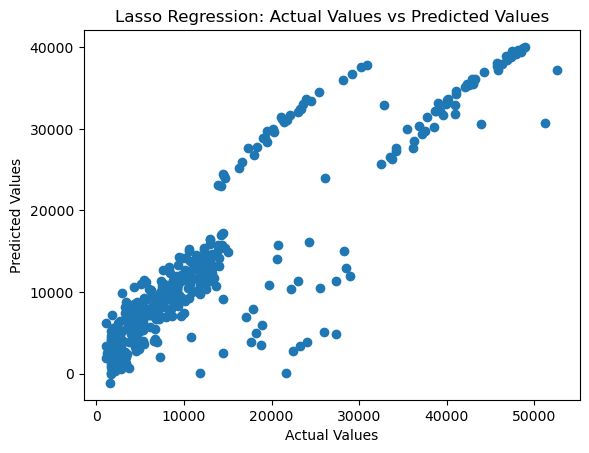

In [92]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(x_train, y_train)
lasso_reg_accuracy = lasso_reg.score(x_test, y_test)
y_pred = lasso_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
Lasso_reg_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
Lasso_reg_rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"R-squared: {Lasso_reg_r2}")
print(f"MAE: {mae}")
print(f"RMSE: {Lasso_reg_rmse}")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"Lasso Regression Accuracy: {lasso_reg_accuracy*100}")
cv_lasso_reg = cross_val_score(Lasso(), x, y, cv=kf)
cvlr=cv_lasso_reg.mean()
print(f"Cross-validated Lasso Regression Accuracy: {cvlr*100}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual Values vs Predicted Values")
plt.show()

RANDOM FOREST REGRESSION

c:\Users\satish\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 21934665.597647768
R-squared (R2): 0.8624522532726071
MAE: 2788.5559112774786
RSME:4683.445910614082
Random Forest Regression Accuracy: 86.24522532726071
Cross-validated Random Forest Regression Accuracy: 83.22131205261113


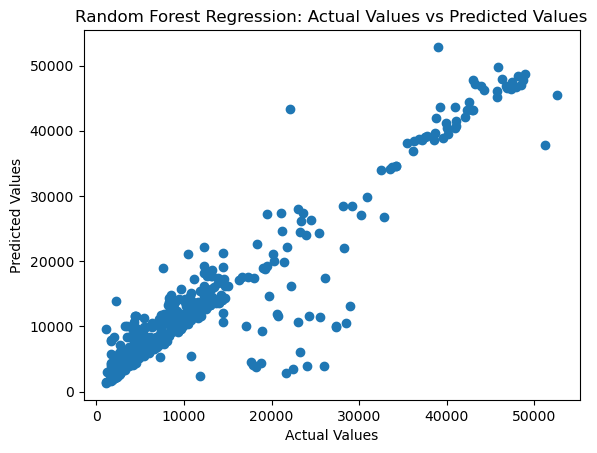

In [93]:
from sklearn.ensemble import RandomForestRegressor
y=y.values.ravel()
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest_accuracy = random_forest.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
random_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
random_rsme=np.sqrt(mse)
print(f"MSE: {mse}")
print(f"R-squared (R2): {random_r2}")
print(f"MAE: {mae}")
print(f"RSME:{random_rsme}")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"Random Forest Regression Accuracy: {random_forest_accuracy*100}")
cv_random_forest_reg = cross_val_score(RandomForestRegressor(), x, y, cv=kf)
cvrfr=cv_random_forest_reg.mean()
print(f"Cross-validated Random Forest Regression Accuracy: {cvrfr*100}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual Values vs Predicted Values")
plt.show()

DECISION TREE REGRESSION

MSE: 45920481.48871447
R-squared: 0.7120421677143336
MAE: 3109.0124658432833
RMSE: 6776.465265071051
Decision Tree Regression Accuracy: 71.20421677143337


Cross-validated Decision Tree Regression Accuracy: 71.4782856263003


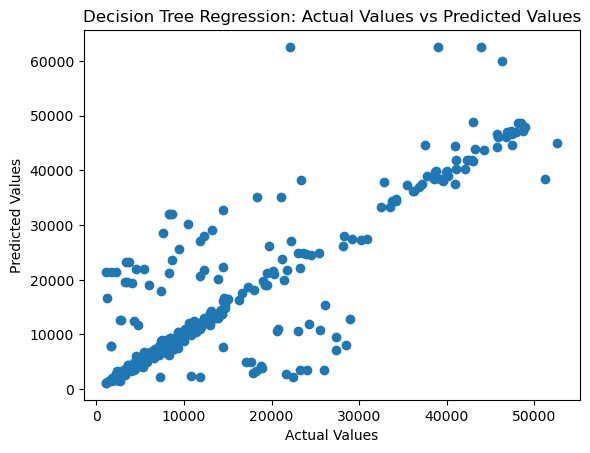

In [94]:
from sklearn.tree import DecisionTreeRegressor
decision_tree= DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
decision_reg_accuracy = decision_tree.score(x_test, y_test)
y_pred = decision_tree.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
decision_reg_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
decision_reg_rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"R-squared: {decision_reg_r2}")
print(f"MAE: {mae}")
print(f"RMSE: {decision_reg_rmse}")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"Decision Tree Regression Accuracy: {decision_reg_accuracy*100}")
cv_decision_reg = cross_val_score(DecisionTreeRegressor(), x, y, cv=kf)
cvdr=cv_decision_reg.mean()
print(f"Cross-validated Decision Tree Regression Accuracy: {cvdr*100}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: Actual Values vs Predicted Values")
plt.show()

GRADIENT BOOSTING REGRESSION

c:\Users\satish\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 17620562.45349894
R-squared (R2): 0.8895051009208004
MAE: 2485.969921712521
RSME:4197.685368569081
Gradient Boosting Regression Accuracy: 86.24522532726071
Cross-validated Gradient Boosting Regression Accuracy: 85.3367861040763


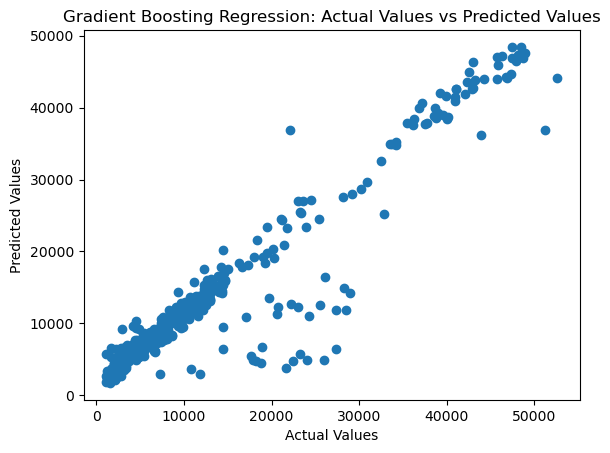

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosting= GradientBoostingRegressor()
mdl=gradient_boosting.fit(x_train, y_train)
y_pred = mdl.predict(x_test)
gradient_boosting_accuracy = random_forest.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
gradient_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
gradient_rsme=np.sqrt(mse)
print(f"MSE: {mse}")
print(f"R-squared (R2): {gradient_r2}")
print(f"MAE: {mae}")
print(f"RSME:{gradient_rsme}")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"Gradient Boosting Regression Accuracy: {gradient_boosting_accuracy*100}")
cv_gradient_reg= cross_val_score(GradientBoostingRegressor(), x, y, cv=kf)
cvgr=cv_gradient_reg.mean()
print(f"Cross-validated Gradient Boosting Regression Accuracy: {cvgr*100}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regression: Actual Values vs Predicted Values")
plt.show()

K-NEAREST NEIGHBOUR(KNN)

MSE: 138053081.90411514
R-squared (R2): 0.13429770514853046
MAE: 8302.718594798507
RSME:11749.599223127363
KNN Regression Accuracy: 13.429770514853045
Cross-validated KNN Regression Accuracy: 6.24638544685121


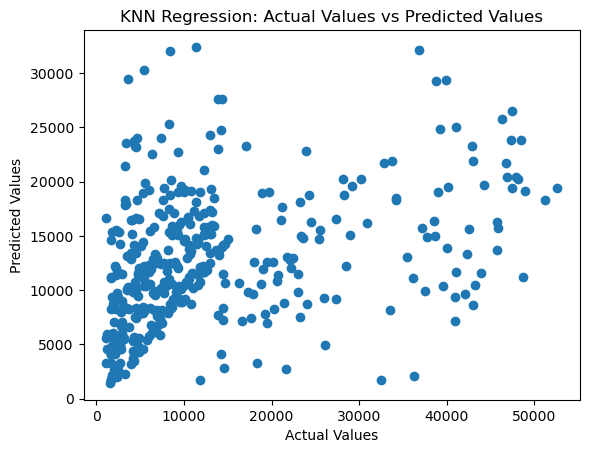

In [96]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)
knn_accuracy = knn_regressor.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
knn_rsme=np.sqrt(mse)
print(f"MSE: {mse}")
print(f"R-squared (R2): {knn_r2}")
print(f"MAE: {mae}")
print(f"RSME:{knn_rsme}")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"KNN Regression Accuracy: {knn_accuracy*100}")
cv_knn_reg= cross_val_score(KNeighborsRegressor(), x, y, cv=kf)
cvkr=cv_knn_reg.mean()
print(f"Cross-validated KNN Regression Accuracy: {cvkr*100}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regression: Actual Values vs Predicted Values")
plt.show()


              Model  Accuracy
0            LINEAR  0.739928
1        POLYNOMIAL  0.834767
2             RIDGE  0.739993
3             LASSO  0.739937
4      RANDOMFOREST  0.832213
5      DECISIONTREE  0.714783
6  GRADIENTBOOSTING  0.853368
7               KNN  0.062464


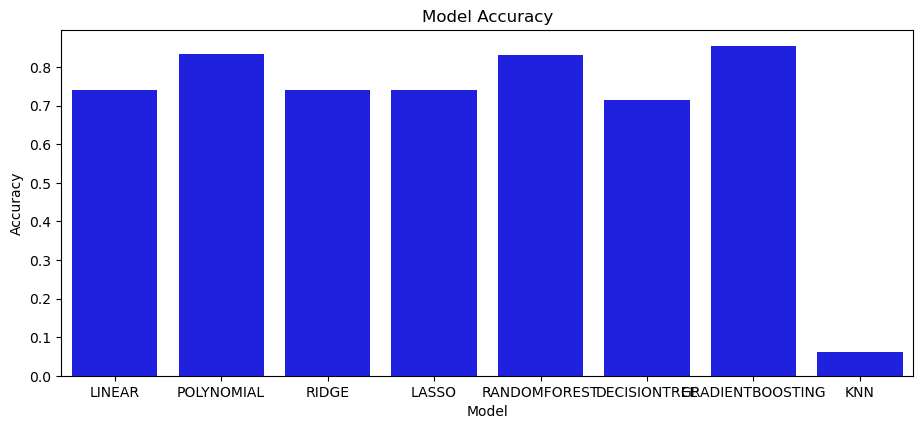

In [97]:
data = {
    'Model':['LINEAR','POLYNOMIAL','RIDGE','LASSO','RANDOMFOREST','DECISIONTREE','GRADIENTBOOSTING','KNN'],
    'Accuracy': [cvlnr,cvpr,cvrr,cvlr,cvrfr,cvdr,cvgr,cvkr]
}
dtfm= pd.DataFrame(data)
print(dtfm)
plt.figure(figsize=(18,8))
plt.subplot(2, 2, 1)
sns.barplot(x=dtfm['Model'], y=dtfm['Accuracy'], color='blue')
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()

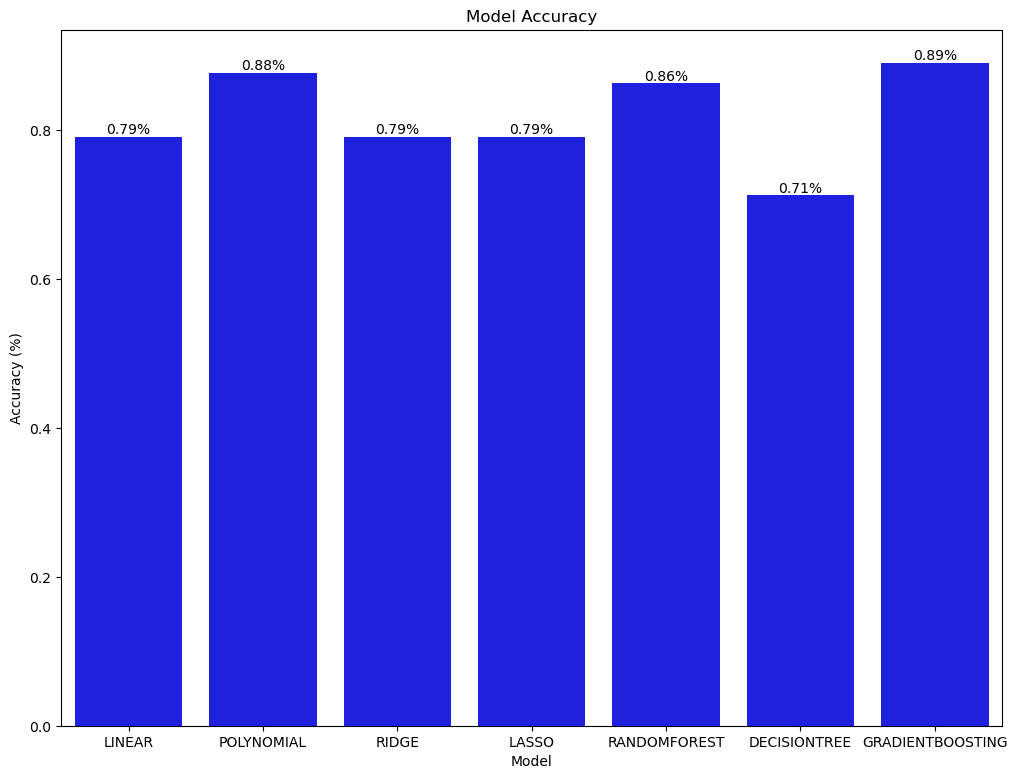

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for demonstration


data = {
    'Model':['LINEAR','POLYNOMIAL','RIDGE','LASSO','RANDOMFOREST','DECISIONTREE','GRADIENTBOOSTING'],
    'Accuracy': [Linear_reg_r2, Polynomial_reg_r2, Ridge_reg_r2, Lasso_reg_r2, random_r2,decision_reg_r2, gradient_r2]
}
dtfm = pd.DataFrame(data)

plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.barplot(x=dtfm['Model'], y=dtfm['Accuracy'], color='blue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')  # Add y-axis label

# Add percentage labels on bars
for index, value in enumerate(dtfm['Accuracy']):
    plt.text(index,value, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [105]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Polynomial Regression', 'Ridge Regression','Lasso Regression','Random Forest Regression','Decision Tree Regressor','Gradient Boosting Regression','KNN Regression'],
    'RMSE' : [Linear_reg_rmse, Polynomial_reg_rmse, Ridge_reg_rmse,Lasso_reg_rmse,random_rsme,decision_reg_rmse,gradient_rsme,knn_rsme],
    'r2_score' : [Linear_reg_r2, Polynomial_reg_r2, Ridge_reg_r2,Lasso_reg_r2,random_r2,decision_reg_r2,gradient_r2,knn_r2],
    'cv_score':[cvlnr,cvpr,cvrr,cvlr,cvrfr,cvdr,cvgr,cvkr],
        
    
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score,cv_score
6,Gradient Boosting Regression,4197.685369,0.889505,85.300000
1,Polynomial Regression,4432.975404,0.876771,83.400000
4,Random Forest Regression,4683.445911,0.862452,83.200000
0,Linear Regression,5776.569812,0.790751,73.900000
3,Lasso Regression,5776.918154,0.790726,73.900000
2,Ridge Regression,5782.971127,0.790287,73.900000
5,Decision Tree Regressor,6776.465265,0.712042,71.400000
7,KNN Regression,11749.599223,0.134298,0.062464


In [100]:
import pickle
pickle.dump(mdl, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

In [101]:
!pip install flask